In [8]:
from pyoculus.problems import AnalyticCylindricalBfield
from pyoculus.solvers import PoincarePlot, FixedPoint, Manifold
%matplotlib ipympl
import matplotlib.pyplot as plt
plt.style.use('lateky')

import numpy as np
import pickle

In [9]:
# Creating the pyoculus problem object, adding the perturbation here use the R, Z provided as center point
pyoproblem = AnalyticCylindricalBfield(
    6,
    0,
    0.8875,
    0.2
)

In [ ]:
# set up the integrator for the Poincare
iparams = dict()
iparams["rtol"] = 1e-10

# set up the Poincare plot
pparams = dict()
pparams["nPtrj"] = 2
pparams["nPpts"] = 300
pparams["zeta"] = 0

# Set RZs for the normal (R-only) computation
pparams["Rbegin"] = pyoproblem._R0+1e-3
pparams["Rend"] = 8

# Set up the Poincare plot object
pplot = PoincarePlot(pyoproblem, pparams, integrator_params=iparams)

# # R-only computation
pplot.compute()

In [ ]:
fig, ax = pplot.plot(marker=".", s=1)
# # plt.show()
# # fig.canvas.toolbar_visible = True
# fig.canvas.toolbar_visible = 'fade-in-fade-out'
# # fig.canvas.toolbar_position = 'top'
# fig.canvas.header_visible = False
# fig.canvas.footer_visible = True
# fig.canvas.resizable = False
# # fig.canvas.capture_scroll = True

# # fig.canvas.toolbar_visible = True
# display(fig)

In [ ]:
pplot.compute_iota()

In [ ]:
pplot.plot_q(marker=".")

### Straight field line coordinates

In [10]:
rho = 1.75
phis = np.linspace(0, 2*np.pi, 5)
thetas = np.linspace(0, 2*np.pi, 100)

X, Y = np.meshgrid(thetas, phis)
# Flattening of the coordinates
iota = 2/3
# X = Y*iota

coords = np.array([[6+rho*np.cos(theta), phi, rho*np.sin(theta)] for theta, phi in zip(X.flatten(), Y.flatten())])
Bs = pyoproblem.B_many(*coords.T)

In [11]:
coords = coords.reshape(X.shape + (3,))
Bs = Bs.reshape(X.shape + (3,))

In [39]:
Bphi = Bs[:,:,1]
Btheta = (np.cos(X) * Bs[:,:,2] - np.sin(X) * Bs[:,:,0])/rho

# Normalization
norm = np.sqrt(Bphi**2 + Btheta**2)
Bphi /= norm
Btheta /= norm

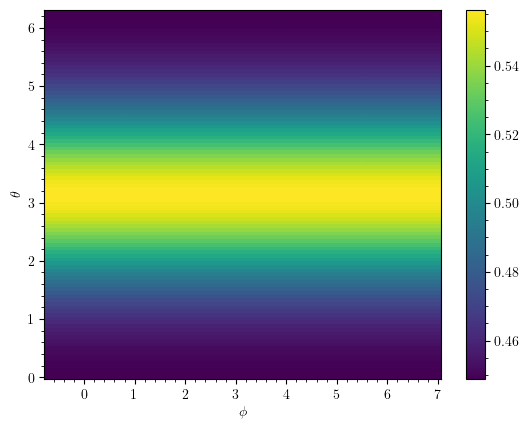

In [54]:
plt.ioff()
fig, ax = plt.subplots()
# ax.quiver(Y, X, Bphi, Btheta, scale=1, scale_units='xy')
contour = ax.pcolor(Y, X, np.arctan(Btheta/Bphi), shading='auto')
fig.colorbar(contour, ax=ax)
ax.set_xlabel(r"$\phi$")
ax.set_ylabel(r"$\theta$")
ax.grid(False)
fig

In [58]:
0.66/2*np.pi

1.0367255756846319

#### Adding the perturbation

In [ ]:
maxwellboltzmann = {"m": 3, "n": -2, "d": 1.75/np.sqrt(2), "type": "maxwell-boltzmann", "amplitude": 1e-1}
pyoproblem.add_perturbation(maxwellboltzmann)

In [ ]:
pyoproblem.amplitudes = [1e-1]

In [ ]:
pyoproblem.perturbations_args

In [ ]:
# set up the integrator for the Poincare
iparams = dict()
iparams["rtol"] = 1e-10

# set up the Poincare plot
pparams = dict()
pparams["nPtrj"] = 15
pparams["nPpts"] = 150
pparams["zeta"] = 0

# Set RZs for the normal (R-only) computation
pparams["Rbegin"] = pyoproblem._R0+1e-3
pparams["Rend"] = 8.5

# Set up the Poincare plot object
pplot_perturbed = PoincarePlot(pyoproblem, pparams, integrator_params=iparams)

# # R-only computation
pplot_perturbed.compute()

In [ ]:
fig_perturbed.clear()

In [ ]:
fig.clear()
fig, ax = pplot_perturbed.plot(marker=".", s=1)
fig

In [ ]:
plt.ioff()
fig_perturbed, ax_perturbed = pplot_perturbed.plot(marker=".", s=1)
fig_perturbed

In [ ]:
# pyoproblem.plot_intensities([4, 8], [-2, 2], ax=ax_perturbed, alpha=0.3)
display(fig_perturbed.canvas)

In [ ]:
guess = [4.2, 0.]
# ax_perturbed.scatter(*guess)
# fig_perturbed

In [ ]:
# set up the integrator for the FixedPoint
iparams = dict()
iparams["rtol"] = 1e-13

pparams = dict()
pparams["nrestart"] = 0
pparams["niter"] = 300
pparams['Z'] = 0

# set up the FixedPoint object
fixedpoint = FixedPoint(pyoproblem, pparams, integrator_params=iparams)

# find the X-point
fixedpoint.compute(guess=guess, pp=2, qq=3, sbegin=2, send=10, tol=1e-10)

if fixedpoint.successful:
    results = [list(p) for p in zip(fixedpoint.x, fixedpoint.y, fixedpoint.z)]
else:
    raise ValueError("X-point not found")

In [ ]:
pparams.pop("Z")
# set up the FixedPoint object
fp_x2 = FixedPoint(pyoproblem, pparams, integrator_params=iparams)
fp_x2.compute(guess=[6.44042536414122, 1.7065049712562115], pp=2, qq=3, sbegin=2, send=10, tol=1e-10)

In [ ]:
fig_perturbed

In [ ]:
results
for rr in results:
    ax_perturbed.scatter(rr[0], rr[2], marker="X", edgecolors="black", linewidths=1)

In [ ]:
ax_perturbed.set_title("Perturbed Poincare plot")
fig_perturbed

In [ ]:
# Set up the manifold
iparams = dict()
iparams["rtol"] = 1e-13
manifold = Manifold(pyoproblem, fixedpoint, fp_x2, integrator_params=iparams)

In [ ]:
manifold.choose(signs=[[1, -1], [-1, 1]])

In [ ]:
manifold.inner

In [ ]:
manifold.outer

In [ ]:
manifold.compute(neps=30, nintersect=8)

In [ ]:
manifold.plot(ax=ax_perturbed)

In [ ]:
fig_perturbed

In [ ]:
manifold.onworking = manifold.outer
manifold.find_clinics(n_points=4)

In [ ]:
manifold.onworking = manifold.inner
manifold.find_clinics(n_points=4)

In [ ]:
manifold.onworking = manifold.outer
marker = ["X", "o", "s", "p", "P", "*", "x", "D", "d", "^", "v", "<", ">"]
confns = manifold.onworking["find_clinic_configuration"]
n_u = confns["n_u"]+confns["n_s"]+2

for i, clinic in enumerate(manifold.onworking["clinics"]):
    eps_s_i, eps_u_i = clinic[1:3]
    
    hu_i = manifold.integrate(manifold.onworking["rfp_u"] + eps_u_i * manifold.onworking["vector_u"], n_u, 1)
    ax_perturbed.scatter(hu_i[0,:], hu_i[1,:], marker=marker[i], color="royalblue", edgecolor='cyan', zorder=10, label=f'$h_{i+1}$')

In [ ]:
manifold.onworking = manifold.inner
manifold.turnstile_area()

In [ ]:
manifold.onworking = manifold.outer
manifold.turnstile_area()

In [ ]:
manifold.inner["areas"]

In [ ]:
manifold.outer["areas"]

In [ ]:
inner_areas = manifold.inner["areas"][:,0]
outer_areas = manifold.outer["areas"][:,0]

In [ ]:
inner_areas.sum(), outer_areas.sum()

In [ ]:
import pandas as pd

data = [
    {"type": "inner", "area": inner_areas[inner_areas > 0].sum(), "Error_by_diff": manifold.inner["areas"][:, 1][inner_areas > 0].sum(), "Error_by_estim": manifold.inner["areas"][:, 2][inner_areas > 0].sum(), "total_sum": inner_areas.sum()},
    {"type": "outer", "area": outer_areas[outer_areas > 0].sum(), "Error_by_diff": manifold.outer["areas"][:, 1][outer_areas > 0].sum(), "Error_by_estim": manifold.outer["areas"][:, 2][outer_areas > 0].sum(), "total_sum": outer_areas.sum()},
]

df = pd.DataFrame(data)

In [ ]:
df

In [ ]:
outer_areas[outer_areas > 0].sum()

In [ ]:
inner_areas[inner_areas > 0].sum()

In [ ]:
potential_integrations = manifold.inner["potential_integrations"]
fwd = np.min([len(pot[0]) for pot in potential_integrations])
bwd = np.min([len(pot[1]) for pot in potential_integrations])
inner_int = [pot[1][:fwd].sum() - pot[0][:bwd].sum() for pot in potential_integrations]
print(inner_int)
inner_int = np.mean(inner_int)

In [ ]:
potential_integrations = manifold.outer["potential_integrations"]
fwd = np.min([len(pot[0]) for pot in potential_integrations])
bwd = np.min([len(pot[1]) for pot in potential_integrations])
outer_int = [pot[1][:fwd].sum() - pot[0][:bwd].sum() for pot in potential_integrations]
print(outer_int)
outer_int = np.mean(outer_int)

In [ ]:
outer_int - inner_int

In [ ]:
manifold.find_homoclinic(9.690951179619085e-07, 4.6186933097797397e-07)

In [ ]:
manifold.find_clinics(n_points = 6)

In [ ]:
fund = manifold.fundamental_segment

In [ ]:
length = np.array([si[1]-si[0] for si in fund])

In [ ]:
length*np.power(manifold.lambda_u, 28)

In [ ]:
manifold.find_clinics(n_points=4)

In [ ]:
marker = ["X", "o", "s", "p", "P", "*", "x", "D", "d", "^", "v", "<", ">"]
for i, clinic in enumerate(manifold.onworking["clinics"]):
    eps_s_i, eps_u_i = clinic[1:3]

    n_u = 16
    
    # hs_i = manifold.integrate(manifold.rfp_s + eps_s_i * manifold.vector_s, n_s, -1)
    hu_i = manifold.integrate(manifold.onworking["rfp_u"] + eps_u_i * manifold.onworking["vector_u"], n_u, 1)
    # ax.scatter(hs_i[0,:], hs_i[1,:], marker=marker[i], color="royalblue", edgecolor='cyan', zorder=10)
    ax_perturbed.scatter(hu_i[0,:], hu_i[1,:], marker=marker[i], color="royalblue", edgecolor='cyan', zorder=10, label=f'$h_{i+1}$')

In [ ]:
rz = manifold.clinics[0][-1]

cont = True
while cont:
    rz = manifold.integrate_single(rz, 1, -1, ret_jacobian=False)
    if np.linalg.norm(rz - manifold.rfp_u) > length:
        cont = False
    length = np.linalg.norm(rz - manifold.rfp_u) 

In [ ]:
manifold.integrate_single(manifold.rfp_u + manifold.clinics[0][0]*manifold.vector_u, 11, -1, ret_jacobian=False)

In [ ]:
manifold.rfp_u

In [ ]:
fig_perturbed.set_size_inches(12, 12)
# ax_perturbed.set_xlim(4.4, 6.8)
# ax_perturbed.set_ylim(-0.3, 1.4)
ax_perturbed.legend()
display(fig_perturbed.canvas)

In [ ]:
areas, potential_integrations, history = manifold.resonance_area()

In [ ]:
fwd = np.min([len(pot[0]) for pot in potential_integrations])
bwd = np.min([len(pot[1]) for pot in potential_integrations])

In [ ]:
[pot[1][:fwd].sum() - pot[0][:bwd].sum() for pot in potential_integrations]

In [ ]:
manifold.areas

In [ ]:
areas = manifold.areas[:,0]

In [ ]:
areas[areas > 0].sum()

In [ ]:
areas.sum()

In [ ]:
np.isclose(areas.sum(), 0, atol=1e-2*np.abs(areas).max())

In [ ]:
eps_s_lb = manifold.find_epsilon(manifold.rfp_s, manifold.vector_s, direction=-1)
eps_u_lb = manifold.find_epsilon(manifold.rfp_u, manifold.vector_u)

In [ ]:
bounds = manifold.find_bounds(eps_s_lb, eps_u_lb)

In [ ]:
n_s, n_u = manifold.find_N(eps_s_lb, eps_u_lb)
print(n_s, n_u)

In [ ]:
space_u = np.logspace(
            np.log(bounds[1][0]) / np.log(manifold.lambda_u),
            np.log(bounds[1][1]) / np.log(manifold.lambda_u),
            20,
            base=manifold.lambda_u,
        )

space_s = np.logspace(
            np.log(bounds[0][0]) / np.log(manifold.lambda_s),
            np.log(bounds[0][1]) / np.log(manifold.lambda_s),
            20,
            base=manifold.lambda_s,
        )

In [ ]:
n_s, n_u = 16, 16
def evolution(self, eps):
    print(eps)
    eps_s, eps_u = eps
    r_s = self.rfp_s + eps_s * self.vector_s
    r_u = self.rfp_u + eps_u * self.vector_u

    try:
        r_s_evolved = self.integrate_single(r_s, n_s, -1, ret_jacobian = False)
    except Exception as e:
        print(f"Error in stable manifold integration : {e}")

    try:
        r_u_evolved = self.integrate_single(r_u, n_u, 1, ret_jacobian = False)
    except Exception as e:
        print(f"Error in unstable manifold integration : {e}")

    return r_s_evolved - r_u_evolved

es, eu = np.meshgrid(space_s, space_u)
E = np.array([evolution(manifold, [S, U]) for S, U in zip(es.flatten(), eu.flatten())]).reshape(es.shape + (2,))

In [ ]:
N = np.linalg.norm(E, axis=2)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot()
contour = ax.contourf(es, eu, N)
plt.colorbar(contour)

# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(es, eu, N, cmap='viridis')

In [ ]:
n_s = 17
n_u = 16

def iteration(eps_u):
    r_s_E, intA = manifold.integrate_single(manifold.rfp_u + eps_u * manifold.vector_u, n_s+n_u-1, 1, ret_jacobian=False, integrate_A=True)
    ax.scatter(*r_s_E, s=15, edgecolor='black', zorder=10)
    # r_dir = r_s_E - manifold.rfp_s
    # r_dir = r_dir / np.linalg.norm(r_dir)
    return intA

In [ ]:
space = np.linspace(bounds[1][0], bounds[1][1], 100)

In [ ]:
arr = []
for eps in space:
    arr.append(iteration(eps))

In [ ]:
fig, ax = plt.subplots()
ax.plot(space, arr)

In [ ]:
# Set up the manifold
iparams = dict()
iparams["rtol"] = 1e-13
manifold = Manifold(fixedpoint, pyoproblem, integrator_params=iparams)

In [ ]:
manifold.choose(0, 1, directions=["s","u"], sngs=[1, -1])

In [ ]:
manifold.compute(epsilon = 1e-6, neps=100, nintersect=8)

In [ ]:
manfiold.